## Well Data Preparation

Todo:

- Merge more wells into pools
- Do costs need to be more than fixed-per-field? If so provide a column of this.
- Add count of setback wells per pool
- Identify injection point using non-setback, non-abandoned, non-plugged wells
- Update Kyle (also CRC note below)
- Identified a few offshore wells in the mix. Seem to be mostly plugged?
- Review Bill's -> STanford's costs

- Orphan wells - why such a dead-end? Surely it's about blacklisting certain operators?
  - Boomhower et al (2018): There is a large population of nonproductive wells in the state, known as idle wells, which have not produced oil and gas for at least two years and have not been plugged and decommissioned. Idle wells can become orphan wells if they are deserted by insolvent operators. When this happens, there is the risk of shifting responsibilities and costs for decommissioning the wells to the State.
  - In two recent insolvencies involving offshore facilities, Rincon Island and Platform Holly, the bonds recoverable by the State totaled about 32 million — well under the more than 100 million dollars estimated cost to plug and decommission the wells at both facilities.
  - The preliminary analysis performed here finds that 5,540 wells in California may already have no viable operator or be at high risk of becoming orphaned in the near future. The likely plugging and abandonment costs for these wells, based on the State’s historical experience with orphan wells, exceed the available bond funds by a factor of 10 or more. The State’s potential net liability for these wells appears to be about 500 million.
  - An additional 69,425 economically marginal and idle wells are identified here that could become orphan wells in the future as their production declines and/or as they are acquired by financially weaker operators. Increasing the financial security for these wells while they are still profitable may avoid enforcement challenges in the future. Idle Well Fee and Management Plan requirements may also reduce the stock of idle wells, but operators have less incentive to comply with regulations after wells cease production.
  - the bond amounts currently held by the state for these $[all]$ wells cover only about 110 million dollars.
  - Finding 2-5: Wells may be considered deserted and ordered plugged if the operator fails to comply with certain well regulations, including payment of idle well fees
  - Finding 2-6: Since 2008, operators with a history of violating well regulations may be required to hold a life-of-well bond, covering the full estimated lifetime costs of the well and/or production facility, including plugging, decommissioning, and spill response, rather than a categorical indemnity bond based on well depth, or a blanket bond. According to the Division, no operator currently holds such a life-of-well bond.
  - If a well is deserted but the operator cannot pay for the costs of plugging and decommissioning the well, the Division can pursue previous operators as far back as January 1, 1996 $[\text{CRC was only formed in 2014. CRC had Chapter 11 and restructure agreement in July 2020}]$
  - Table 5 presents summary statistics for the analysis dataset. The median production rate across active and idle wells is just 2.7 barrel-of-oil-equivalents (BOE) per day.1 The median year of first production is 1989 and 28% of the unplugged wells in the dataset are officially classified as “idle” by the Division.2 These production statistics underscore the mature status of oil and gas fields in California. With few major discoveries in recent decades, producers are now focused on efficiently extracting remaining oil and gas from partially-depleted fields. Most wells are located onshore (about 98%), accounting for 95% of production during 2013–2017. Of the 1,454 operators with any active or idle (unplugged) wells, 1,099 operate only idle wells. At the same time, 91% of idle wells belong to operators that also have active wells. As shown later, this reflects the fact that a few companies operate a large share of all wells.

| Table 5 | Summary statistics for analysis dataset |
| :-: | :-: |
| Wells | 228,648 |
| Plugged | 121,961 |
| Active/Idle | 106,687 |

| Among Active/Idle Wells | |
| :-: | :-: |
| Median Daily Production (BOE)* | 2.7 |
| Median Year of First Production* | 1989 |
| % of Wells Offshore | 2.3 |
| % of Production Offshore | 5.3 |
| % of Wells Idle | 28 |
| Operators with Active or Idle Wells | 1,454 |
| Operators with only Idle Wells | 1,099 |
| % of Idle Wells Belonging to Operators with some Active Wells | 91 |

*Starred values calculated using well types OG, GAS,
and Multi.


In [1]:
import os
import time
import numpy as np
import pandas as pd
DATADIR = 'D:/W210_Capstone/co2-storage-fall2021/data/'
os.chdir(DATADIR)
wells = pd.read_csv(r'./CalGEM_ProInj_FracTracker_8.5.21.csv', engine='python')

In [2]:
# Cell will graph well production over the years
print('wells in the original 1977+ producer wells list:', len(wells))

wells in the original 1977+ producer wells list: 293115


In [3]:
# Calculate each well's total production
totaloil_cols = [ o for o in wells.columns if 'TotalOil' in o ]
totaloil_cols.append('OilorCondensateProduced_2019')
totaloil_cols.append('OilorCondensateProduced_2020')
print(*totaloil_cols)
wells['alloil'] = wells.loc[:, totaloil_cols].sum(axis=1)

totalgas_cols = [ o for o in wells.columns if 'TotalGas' in o ]
totalgas_cols.append('GasProduced_2019')
totalgas_cols.append('GasProduced_2020')
print(*totalgas_cols)
wells['allgas'] = wells.loc[:, totalgas_cols].sum(axis=1)

# Eliminate non-producers
wells = wells[ ((wells['alloil'] >= 10) | (wells['allgas'] >= 100)) ]

print('remaining producers in the 1977+ producer wells list:', len(wells))

# Eliminate wells without valid IDs? But why when we can assign one? Did the last step already remove these?
# wells.iloc['API_ID']
# wells2 = wells[wells['API_ID'].notna()]

TotalOil_77 TotalOil_78 TotalOil_79 TotalOil_80 TotalOil_81 TotalOil_82 TotalOil_83 TotalOil_84 TotalOil_85 TotalOil_86 TotalOil_87 TotalOil_88 TotalOil_89 TotalOil_90 TotalOil_91 TotalOil_92 TotalOil_93 TotalOil_94 TotalOil_95 TotalOil_96 TotalOil_97 TotalOil_98 TotalOil_99 TotalOil_00 TotalOil_01 TotalOil_02 TotalOil_03 TotalOil_04 TotalOil_05 TotalOil_06 TotalOil_07 TotalOil_08 TotalOil_09 TotalOil_10 TotalOil_11 TotalOil_12 TotalOil_13 TotalOil_14 TotalOil_15 TotalOil_16 TotalOil_17 TotalOil_18 OilorCondensateProduced_2019 OilorCondensateProduced_2020
TotalGas_77 TotalGas_78 TotalGas_79 TotalGas_80 TotalGas_81 TotalGas_82 TotalGas_83 TotalGas_84 TotalGas_85 TotalGas_86 TotalGas_87 TotalGas_88 TotalGas_89 TotalGas_90 TotalGas_91 TotalGas_92 TotalGas_93 TotalGas_94 TotalGas_95 TotalGas_96 TotalGas_97 TotalGas_98 TotalGas_99 TotalGas_00 TotalGas_01 TotalGas_02 TotalGas_03 TotalGas_04 TotalGas_05 TotalGas_06 TotalGas_07 TotalGas_08 TotalGas_09 TotalGas_10 TotalGas_11 TotalGas_12 TotalG

In [4]:
# Begin with pools defined as FieldName + AreaName + PoolName
wells['pool_id'] = wells.apply(lambda x:'%s_%s_%s' %
                               (x['FieldName'], x['AreaName'], x['PoolName']), axis=1)

print("Initial number of pools:", len(wells.pool_id.unique()))
wells2 = wells.copy()

Initial number of pools: 1300


In [5]:
#df.loc[df[‘column’] condition, ‘new column name’] = ‘value if condition is met’

# Tag wells linked to poorly labelled yet insignificant pools for later elimination
wells['deadpool'] = False
# wells = wells.iloc[ wells['pool_id'] == 'Aliso Canyon_Any Area_No Pool Breakdown', 'deadpool' = True ]
wells.loc[ wells['pool_id'] == 'Afton Gas_Main_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Aliso Canyon_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Aliso Canyon_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Antelope Hills, North_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Any Field_Any Area_Observation', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Any Field_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Any Field_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Arroyo Grande_Tiber_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Asphalto_Any Area_No Pool Breakdown (ABD)', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Belridge, North_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Belridge, South_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Beverley Hills_East_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Cascade_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Chico-Martinez_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Coalinga_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Coalinga, East, Extension_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Cymric_Sheep Springs_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Cymric_Welport_No Pool Breakdown (ABD)', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Cymric_Welport_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Deer Creek_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Edison_West_No Pool Breakdown (ABD)', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Elk Hills_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Elk Hills_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Elwood, South, Offshore_Main_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Greeley_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Guadalupe (ABD)_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Hasley Canyon_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Helm_Main_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Huntington Beach_South Offshore_TM', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Huntington Beach_South Offshore_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Inglewood_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Kern River_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Kettleman City (ABD)_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Kettleman Middle Dome_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Kettleman North Dome_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Kettleman North Dome_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Lompoc_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Lompoc_Northwest_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Long Beach_Old_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Lost Hills_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Lost Hills_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Lynch Canyon_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'McKittrick_Main_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'McKittrick_Northeast_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Moffat Ranch Gas_Any Area_No Pool Breakdown (ABD)', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Montalvo, West_Offshore_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Montebello_Main_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Monument Junction_Main_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Monument Junction_Mongoose_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Mount Poso_Main_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Olive_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Orcutt_Main_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Oxnard_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Oxnard_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Petaluma (ABD)_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Playa Del Rey_Venice_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Poso Creek_McVan_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Pyramid Hills_Dagany_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Railroad Gap_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Raisin City_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Rio Bravo_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Rio Bravo_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Riverdale_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Rosedale Ranch_Main_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Round Mountain_Coffee Canyon_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Round Mountain_Shark Tooth_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Salt Lake_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Santa Fe Springs_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Sawtelle_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Semitropic_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'South Mountain_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Tapia_Any Area_Saugus', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Tejon, North_Any Area_No Pool Breakdown (ABD)', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Ten Section_Main_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Tracy Gas (ABD)_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Tulare Lake_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Ventura_Any Area_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wheeler Ridge_Central_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wheeler Ridge_Windgap_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Whittier_Central_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Fault Block 90_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Fault Block I_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Fault Block II-B_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Fault Block IV_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Fault Block V_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Fault Block VI_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Fault Block VII_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Fault Block VIII_', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Winchester Lake Gas_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'Yorba Linda (ABD)_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'F_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['pool_id'] == 'F_Any Area_No Pool Breakdown', 'deadpool'] = True
wells.loc[ wells['FieldName'] == '', 'deadpool'] = True
wells.loc[ wells['FieldName'] == 0, 'deadpool'] = True
wells.loc[ wells['FieldName'] == 'nan', 'deadpool'] = True
wells.loc[ wells['pool_id'] == '0_0_0', 'deadpool'] = True

# magenta: redistributing significant contribution from no-pool-breakdown to other pools
# wells.iloc[ wells['pool_id'] == 'Bardsdale_Any Area_No Pool Breakdown', 'pool_id'] = 'Bandini_pool'
print(len(wells))
print('dead pool wells:', wells.deadpool.sum())
wells = wells[~wells.deadpool]
print(len(wells))

128479
dead pool wells: 1212
127267


In [6]:
# Simplify field pool name when field has no breakdown at all
# While tagging the wells with names set to match others as not ideal injection points
wells['allocated'] = False
wells.loc[ wells['pool_id'] == 'Alondra (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Alondra (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Bandini_Any Area_No Pool Breakdown', 'pool_id'] = 'Bandini_pool'
wells.loc[ wells['pool_id'] == 'Barham Ranch_Old_No Pool Breakdown', 'pool_id'] = 'Barham Ranch_pool'
wells.loc[ wells['pool_id'] == 'Surfside_Any Area_No Pool Breakdown', 'pool_id'] = 'Surfside_pool'
wells.loc[ wells['pool_id'] == 'Belridge, North_Any Area_No Pool Breakdown', 'pool_id'] = 'Belridge North_pool'
wells.loc[ wells['pool_id'] == 'Bitterwater_Any Area_No Pool Breakdown', 'pool_id'] = 'Bitterwater_pool'
wells.loc[ wells['pool_id'] == 'Buena Vista_Buena Vista Front_No Pool Breakdown', 'pool_id'] = 'Buena Vista_Front_pool'
wells.loc[ wells['pool_id'] == 'Bunker Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Bunker Gas_pool'
wells.loc[ wells['pool_id'] == 'Butte Sink Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Butte Sink Gas_pool'
wells.loc[ wells['pool_id'] == 'Butte Slough Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Butte Slough Gas_pool'
wells.loc[ wells['pool_id'] == 'Buttonwillow Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Buttonwillow Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Cache Slough Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Cache Slough Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Canada Larga_Any Area_No Pool Breakdown', 'pool_id'] = 'Canada Larga_pool'
wells.loc[ wells['pool_id'] == 'Canton Creek (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Canton Creek (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Capitola Park (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Capitola Park (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Carpinteria Offshore (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Carpinteria Offshore (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Casmalia_Any Area_No Pool Breakdown', 'pool_id'] = 'Casmalia_pool'
wells.loc[ wells['pool_id'] == 'Chino-Soquel_Any Area_No Pool Breakdown', 'pool_id'] = 'Chino-Soquel_pool'
wells.loc[ wells['pool_id'] == 'Comanche Point_Any Area_No Pool Breakdown', 'pool_id'] = 'Comanche Point_pool'
wells.loc[ wells['pool_id'] == 'Conway Ranch Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Conway Ranch Gas_pool'
wells.loc[ wells['pool_id'] == 'Corning Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Corning Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Corning, South, Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Corning South Gas_pool'
wells.loc[ wells['pool_id'] == 'Cotati Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Cotati Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Davis Southeast Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Davis Southeast Gas_pool'
wells.loc[ wells['pool_id'] == 'Deer Creek, North_Any Area_No Pool Breakdown', 'pool_id'] = 'Deer Creek, North_pool'
wells.loc[ wells['pool_id'] == 'Del Valle_South_No Pool Breakdown', 'pool_id'] = 'Del Valle_South_pool'
wells.loc[ wells['pool_id'] == 'Denverton Creek Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Denver Creek Gas_pool'
wells.loc[ wells['pool_id'] == 'Devils Den_Alferitz_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Devils Den_Alferitz_No Pool Breakdown', 'pool_id'] = 'Devils Den_Alferitz_Eocene Gas Zone'
wells.loc[ wells['pool_id'] == 'Devils Den_Bates_No Pool Breakdown', 'pool_id'] = 'Devils Den_Bates_pool'
wells.loc[ wells['pool_id'] == 'Dixon, East, Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Dixon East Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Dominguez_Any Area_No Pool Breakdown', 'pool_id'] = 'Dominguez_pool'
wells.loc[ wells['pool_id'] == 'Dufour Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Dufour Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Dunnigan Hills Gas_Main_No Pool Breakdown', 'pool_id'] = 'Dunnigan Hills Gas_Main_pool'
wells.loc[ wells['pool_id'] == 'Durham Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Durham Gas_pool'
wells.loc[ wells['pool_id'] == 'Dutch Slough Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Dutch Slough Gas_pool'
wells.loc[ wells['pool_id'] == 'Dyer Creek_Any Area_No Pool Breakdown', 'pool_id'] = 'Dyer Creek_pool'
wells.loc[ wells['pool_id'] == 'Edison_Edison Groves_No Pool Breakdown', 'pool_id'] = 'Edison_Edison Groves_pool'
wells.loc[ wells['pool_id'] == 'Edison_Jeppi_No Pool Breakdown', 'pool_id'] = 'Edison_Jeppi_pool'
wells.loc[ wells['pool_id'] == 'Edison_Portals-Fairfax_No Pool Breakdown', 'pool_id'] = 'Edison_Portals-Fairfax_pool'
wells.loc[ wells['pool_id'] == 'El Rio (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'El Rio (ABD)_pool'
wells.loc[ wells['pool_id'] == 'El Segundo_Any Area_No Pool Breakdown', 'pool_id'] = 'El Segundo_pool'
wells.loc[ wells['pool_id'] == 'Elwood_Offshore_No Pool Breakdown', 'pool_id'] = 'Elwood_Offshore_pool'
wells.loc[ wells['pool_id'] == 'Esperanza_Any Area_No Pool Breakdown', 'pool_id'] = 'Esperanza_pool'
wells.loc[ wells['pool_id'] == 'Eureka Canyon_Any Area_No Pool Breakdown', 'pool_id'] = 'Eureka Canyon_pool'
wells.loc[ wells['pool_id'] == 'Fairfield Knolls Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Fairfield Knolls Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Fillmore_Any Area_No Pool Breakdown', 'pool_id'] = 'Fillmore_pool'
wells.loc[ wells['pool_id'] == 'Freeport Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Freeport Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'French Camp Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'French Camp Gas_pool'
wells.loc[ wells['pool_id'] == 'Fruitvale_Calloway (ABD)_No Pool Breakdown', 'pool_id'] = 'Fruitvale_Calloway (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Fruitvale_Main_No Pool Breakdown', 'pool_id'] = 'Fruitvale_Main_pool'
wells.loc[ wells['pool_id'] == 'Grand Island Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Grand Island Gas_pool'
wells.loc[ wells['pool_id'] == 'Green Lakes Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Green Lakes Gas_pool'
wells.loc[ wells['pool_id'] == 'Harris Canyon, Northwest (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Harris Canyon NW (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Hopper Canyon_Main_No Pool Breakdown', 'pool_id'] = 'Hopper Canyon_Main_pool'
wells.loc[ wells['pool_id'] == 'Howard Townsite_Any Area_No Pool Breakdown', 'pool_id'] = 'Howard_Townsite_pool'
wells.loc[ wells['pool_id'] == 'Howells Point Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Howells Point Gas_pool'
wells.loc[ wells['pool_id'] == 'Huntington Beach_North_No Pool Breakdown', 'pool_id'] = 'Huntington Beach_North_Lower Ashton_pool'
wells.loc[ wells['pool_id'] == 'Huntington Beach_Offshore_No Pool Breakdown', 'pool_id'] = 'Huntington Beach_Offshore_pool'
wells.loc[ wells['pool_id'] == 'Huntington Beach_Offshore_', 'pool_id'] = 'Huntington Beach_Offshore_pool'
wells.loc[ wells['pool_id'] == 'Huntington Beach_Onshore_No Pool Breakdown', 'pool_id'] = 'Huntington Beach_Onshore_pool'
wells.loc[ wells['pool_id'] == 'Hyperion_Any Area_No Pool Breakdown', 'pool_id'] = 'Hyperion_pool'
wells.loc[ wells['pool_id'] == 'Inglewood_Any Area_No Pool Breakdown', 'pool_id'] = 'Inglewood_pool'
wells.loc[ wells['pool_id'] == 'Jerry Slough (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Jerry Slough (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Kirkwood Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Kirkwood Gas_pool'
wells.loc[ wells['pool_id'] == 'Kraemer (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Kraemer (ABD)_pool'
wells.loc[ wells['pool_id'] == 'La Honda_Main_No Pool Breakdown', 'pool_id'] = 'La Honda_Main_pool'
wells.loc[ wells['pool_id'] == 'La Honda_South_No Pool Breakdown', 'pool_id'] = 'La Honda_South_pool'
wells.loc[ wells['pool_id'] == 'Larkin, West, Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Larkin West Gas_pool'
wells.loc[ wells['pool_id'] == 'Las Clenegas_Fourth Avenue_No Pool Breakdown', 'pool_id'] = 'Las Clenegas_Fourth Avenue_pool'
wells.loc[ wells['pool_id'] == 'Las Clenegas_Good Shepherd_No Pool Breakdown', 'pool_id'] = 'Las Clenegas_Good Shepherd_pool'
wells.loc[ wells['pool_id'] == 'Las Clenegas_Jefferson_No Pool Breakdown', 'pool_id'] = 'Las Clenegas_Jefferson_pool'
wells.loc[ wells['pool_id'] == 'Las Clenegas_Murphy_No Pool Breakdown', 'pool_id'] = 'Las Clenegas_Murphy_pool'
wells.loc[ wells['pool_id'] == 'Las Clenegas_Pacific Electric (ABD)_No Pool Breakdown', 'pool_id'] = 'Las Clenegas_Pacific Electric (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Las Posas_Any Area_No Pool Breakdown', 'pool_id'] = 'Las Posas_pool'
wells.loc[ wells['pool_id'] == 'Liberty Island Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Liberty Island Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Little Butte Creek Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Little Butte Creek Gas_pool'
wells.loc[ wells['pool_id'] == 'Livermore_Any Area_No Pool Breakdown', 'pool_id'] = 'Livermore_pool'
wells.loc[ wells['pool_id'] == 'Llano Seco Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Llano Seco Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Lodi Airport Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Lodi Airport Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Lone Tree Creek Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Lone Tree Creek Gas_pool'
wells.loc[ wells['pool_id'] == 'Long Beach_Northwest Extension_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Long Beach_Northwest Extension_No Pool Breakdown', 'pool_id'] = 'Long Beach_Northwest Extension_Alamitos'
wells.loc[ wells['pool_id'] == 'Long Beach_Recreation Park_No Pool Breakdown', 'pool_id'] = 'Long Beach_Recreation Park_pool'
wells.loc[ wells['pool_id'] == 'Los Angeles City_Any Area_No Pool Breakdown', 'pool_id'] = 'Los Angeles City_pool'
wells.loc[ wells['pool_id'] == 'Los Angeles Downtown_Any Area_No Pool Breakdown', 'pool_id'] = 'Los Angeles Downtown_pool'
wells.loc[ wells['pool_id'] == 'Los Angeles, East_Any Area_No Pool Breakdown', 'pool_id'] = 'Los Angeles, East_pool'
wells.loc[ wells['pool_id'] == 'Lyon Canyon (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Lyon Canyon (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Mahala_Abercherli_No Pool Breakdown', 'pool_id'] = 'Mahala_Abacherli_pool'
wells.loc[ wells['pool_id'] == 'Mahala_Mahala_No Pool Breakdown', 'pool_id'] = 'Mahala_Mahala_pool'
wells.loc[ wells['pool_id'] == 'Mahala_Mahala, West,_No Pool Breakdown', 'pool_id'] = 'Mahala_West_pool'
wells.loc[ wells['pool_id'] == 'Mahala_Prado Dam (ABD)_No Pool Breakdown', 'pool_id'] = 'Mahala_Prado Dam (ABD)_pool'
wells.loc[ wells['pool_id'] == 'McDonald Anticline_Layman_No Pool Breakdown', 'pool_id'] = 'McDonald Anticline_Layman_pool'
wells.loc[ wells['pool_id'] == 'McDonald Island Gas_Any Area_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'McDonald Island Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'McDonald Island Gas_Any Area_McDonald Sand'
wells.loc[ wells['pool_id'] == 'Merritt Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Merritt Gas_pool'
wells.loc[ wells['pool_id'] == 'Millar Gas_Main_No Pool Breakdown', 'pool_id'] = 'Millar Gas_pool'
wells.loc[ wells['pool_id'] == 'Monroe Swell_Northwest_No Pool Breakdown', 'pool_id'] = 'Monroe Swell_Northwest_pool'
wells.loc[ wells['pool_id'] == 'Monroe Swell_Old_No Pool Breakdown', 'pool_id'] = 'Monroe Swell_Old_pool'
wells.loc[ wells['pool_id'] == 'Montebello_Any Area_No Pool Breakdown', 'pool_id'] = 'Montebello_pool'
wells.loc[ wells['pool_id'] == 'Moon Bend Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Moon Bend Gas_pool'
wells.loc[ wells['pool_id'] == 'Moorpark West_Any Area_No Pool Breakdown', 'pool_id'] = 'Moorpark West_pool'
wells.loc[ wells['pool_id'] == 'Mountain View_Arvin_No Pool Breakdown', 'pool_id'] = 'Mountain View_Arvin_pool'
wells.loc[ wells['pool_id'] == 'Newgate_Any Area_No Pool Breakdown', 'pool_id'] = 'Newgate_pool'
wells.loc[ wells['pool_id'] == 'Newhall_Elsmere_No Pool Breakdown', 'pool_id'] = 'Newgate_Elsmere_pool'
wells.loc[ wells['pool_id'] == 'Newhall_Pico Canyon (ABD)_No Pool Breakdown', 'pool_id'] = 'Newgate_Pico Canyon (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Newhall_Townsite (ABD)_No Pool Breakdown', 'pool_id'] = 'Newgate_Townsite (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Newhall_Towsley Canyon (ABD)_No Pool Breakdown', 'pool_id'] = 'Newgate_Towsley Canyon (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Newhall_Tunnel_No Pool Breakdown', 'pool_id'] = 'Newgate_Tunnel_pool'
wells.loc[ wells['pool_id'] == 'Newhall_Whitney Canyon_No Pool Breakdown', 'pool_id'] = 'Newgate_Whitney Canyon_pool'
wells.loc[ wells['pool_id'] == 'Newport_Any Area_No Pool Breakdown', 'pool_id'] = 'Newport_pool'
wells.loc[ wells['pool_id'] == 'Newport, West_Offshore-Division D-E_No Pool Breakdown', 'pool_id'] = 'Newport, West_Offshore-Div D-E_pool'
wells.loc[ wells['pool_id'] == 'Ojal_Weldon Canyon_No Pool Breakdown', 'pool_id'] = 'Ojal_Weldon Canyon_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block 90 Offshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block 90 Offshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block 98 Offshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block 98 Offshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block I Onshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block I Onshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block II Onshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block II Onshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block III Offshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block III Offshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block III Onshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block III Onshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block IV Offshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block IV Offshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block IV Onshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block IV Onshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block V Offshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block V Offshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block V Onshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block V Onshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block VI Offshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block VI Offshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block VII Offshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block VII Offshore_pool'
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block VIII Offshore_No Pool Breakdown', 'pool_id'] = 'Old Wilmington (ABD)_Fault Block VIII Offshore_pool'
wells.loc[ wells['pool_id'] == 'Olive_Any Area_No Pool Breakdown', 'pool_id'] = 'Olive_pool'
wells.loc[ wells['pool_id'] == 'Ord Bend Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Ord Bend Gas_pool'
wells.loc[ wells['pool_id'] == 'Orland Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Orland Gas_pool'
wells.loc[ wells['pool_id'] == 'Petrolia_Any Area_No Pool Breakdown', 'pool_id'] = 'Petrolia_pool'
wells.loc[ wells['pool_id'] == 'Piru (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Piru (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Piru Creek (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Piru Creek (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Playa Del Rey_Del Rey Hills_No Pool Breakdown', 'pool_id'] = 'Playa Del Rey_Del Rey Hills_pool'
wells.loc[ wells['pool_id'] == 'Playa Del Rey_Venice_No Pool Breakdown', 'pool_id'] = 'Playa Del Ray_Venice_pool'
wells.loc[ wells['pool_id'] == 'Pleito_Ranch_No Pool Breakdown', 'pool_id'] = 'Pleito_Ranch_pool'
wells.loc[ wells['pool_id'] == 'Pleito_Ranch_', 'pool_id'] = 'Pleito_Ranch_pool'
wells.loc[ wells['pool_id'] == 'Poppy Ridge Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Poppy Ridge Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Poso Creek_Enas_No Pool Breakdown', 'pool_id'] = 'Poso Creek_Enas_pool'
wells.loc[ wells['pool_id'] == 'Poso Creek_McVan_No Pool Breakdown', 'pool_id'] = 'Poso Creek_McVan_pool'
wells.loc[ wells['pool_id'] == 'Potrero (ABD)_East_No Pool Breakdown', 'pool_id'] = 'Potrero (ABD)_East_pool'
wells.loc[ wells['pool_id'] == 'Potrero (ABD)_Inglewood City_No Pool Breakdown', 'pool_id'] = 'Potrero (ABD)_Inglewood City_pool'
wells.loc[ wells['pool_id'] == 'Prada-Corona_Goedhart_No Pool Breakdown', 'pool_id'] = 'Prada-Corona_Goedhart_pool'
wells.loc[ wells['pool_id'] == 'Prada-Corona_Sardco (ABD)_No Pool Breakdown', 'pool_id'] = 'Prada-Sardco (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Ramona_Any Area_No Pool Breakdown', 'pool_id'] = 'Ramona_pool'
wells.loc[ wells['pool_id'] == 'Ramona, North_Any Area_No Pool Breakdown', 'pool_id'] = 'Ramona, North_pool'
wells.loc[ wells['pool_id'] == 'Rancho Capay Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Rancho Capay Gas_pool'
wells.loc[ wells['pool_id'] == 'Refugio Cove Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Refugio Cove Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Rice Creek Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Rice Creek Gas_pool'
wells.loc[ wells['pool_id'] == 'Richfield_Any Area_No Pool Breakdown', 'pool_id'] = 'Richfield_pool'
wells.loc[ wells['pool_id'] == 'Rio Jesus Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Rio Jesus Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'River Break Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'River Break Gas_pool'
wells.loc[ wells['pool_id'] == 'Roberts Island Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Roberts Island Gas_pool'
wells.loc[ wells['pool_id'] == 'Rosecrans_Athens_No Pool Breakdown', 'pool_id'] = 'Rosecrans_Athens_pool'
wells.loc[ wells['pool_id'] == 'Rosecrans_Central_No Pool Breakdown', 'pool_id'] = 'Rosecrans_Central_pool'
wells.loc[ wells['pool_id'] == 'Rosecrans_Main_No Pool Breakdown', 'pool_id'] = 'Rosecrans_Main_pool'
wells.loc[ wells['pool_id'] == 'Rosecrans, East_Any Area_No Pool Breakdown', 'pool_id'] = 'Rosecrans, East_pool'
wells.loc[ wells['pool_id'] == 'Rosecrans, South_Any Area_No Pool Breakdown', 'pool_id'] = 'Rosecrans, South_pool'
wells.loc[ wells['pool_id'] == 'Round Mountain_Alma_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Round Mountain_Alma_No Pool Breakdown', 'pool_id'] = 'Round Mountain_Alma_Vedder'
wells.loc[ wells['pool_id'] == 'Russell Ranch_Main_No Pool Breakdown', 'pool_id'] = 'Russell Ranch_Main_pool'
wells.loc[ wells['pool_id'] == 'Ryer Island Gas_Offshore (ABD)_No Pool Breakdown', 'pool_id'] = 'Ryer Island Gas_Offshore (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Ryer Island Gas_Onshore_No Pool Breakdown', 'pool_id'] = 'Ryer Island Gas_Onshore_pool'
wells.loc[ wells['pool_id'] == 'Salt Lake, South_Any Area_No Pool Breakdown', 'pool_id'] = 'Salt Lake, South_pool'
wells.loc[ wells['pool_id'] == 'Salt Lake_Any Area_No Pool Breakdown', 'pool_id'] = 'Salt Lake_pool'
wells.loc[ wells['pool_id'] == 'Sansinena_Curtis_No Pool Breakdown', 'pool_id'] = 'Sansinena_Curtis_pool'
wells.loc[ wells['pool_id'] == 'Sansinena_East_No Pool Breakdown', 'pool_id'] = 'Sansinena_East_pool'
wells.loc[ wells['pool_id'] == 'Sansinena_New England (ABD)_No Pool Breakdown', 'pool_id'] = 'Sansinena_New England (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Sansinena_West_No Pool Breakdown', 'pool_id'] = 'Sansinena_West_pool'
wells.loc[ wells['pool_id'] == 'Santa Clara Avenue_Any Area_No Pool Breakdown', 'pool_id'] = 'Santa Clara Avenue_pool'
wells.loc[ wells['pool_id'] == 'Santa Fe Springs_Any Area_No Pool Breakdown', 'pool_id'] = 'Santa Fe Springs_pool'
wells.loc[ wells['pool_id'] == 'Santa Maria Valley_West_No Pool Breakdown', 'pool_id'] = 'Santa Maria Valley_West_pool'
wells.loc[ wells['pool_id'] == 'Santa Paula (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Santa Paula (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Sargent_Any Area_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Sargent_Any Area_No Pool Breakdown', 'pool_id'] = 'Sargent_Any Area_Purisma Sand'
wells.loc[ wells['pool_id'] == 'Saticoy_Main_No Pool Breakdown', 'pool_id'] = 'Saticoy_Main_pool'
wells.loc[ wells['pool_id'] == 'Saticoy_South_No Pool Breakdown', 'pool_id'] = 'Saticoy_South_pool'
wells.loc[ wells['pool_id'] == 'Saugus (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Saugus (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Sawtelle_Any Area_No Pool Breakdown', 'pool_id'] = 'Sawtelle_pool'
wells.loc[ wells['pool_id'] == 'Seal Beach_Alamitos_No Pool Breakdown', 'pool_id'] = 'F_pool'
wells.loc[ wells['pool_id'] == 'Seal Beach_North Block_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Seal Beach_North Block_No Pool Breakdown', 'pool_id'] = 'Seal Beach_North Block_Selover'
wells.loc[ wells['pool_id'] == 'Seal Beach_South Block_No Pool Breakdown', 'pool_id'] = 'Seal Beach_South Block_pool'
wells.loc[ wells['pool_id'] == 'Shale Point Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Shale Point Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Sherman Island Gas_Any Area_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Sherman Island Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Sherman Island Gas_Any Area_Anderson'
wells.loc[ wells['pool_id'] == 'Shiells Canyon_Any Area_No Pool Breakdown', 'pool_id'] = 'Shiells Canyon_Any Area_pool'
wells.loc[ wells['pool_id'] == 'Simi_Alamos Canyon (ABD)_No Pool Breakdown', 'pool_id'] = 'Simi_Alamos Canyon (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Simi_Canada de la Brea (ABD)_No Pool Breakdown', 'pool_id'] = 'Simi_Canada de la Brea (ABD)_pool'
# next one name is based on producing oil instead of the "gas zone" pool alongside
wells.loc[ wells['pool_id'] == 'Simi_Old_No Pool Breakdown', 'pool_id'] = 'Simi_Old_Oil Zone'
wells.loc[ wells['pool_id'] == 'South Mountain_Any Area_No Pool Breakdown', 'pool_id'] = 'South Mountain_pool'
wells.loc[ wells['pool_id'] == 'Stone Lake Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Stone Lake Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Suisun Bay Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Suisun Bay Gas_pool'
wells.loc[ wells['pool_id'] == 'Summerland Offshore (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Summerland Offshore (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Sunset Beach (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Sunset Beach (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Sutter Buttes Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Sutter Buttes Gas_pool'
wells.loc[ wells['pool_id'] == 'Sutter City Gas_Main_No Pool Breakdown', 'pool_id'] = 'Sutter City Gas_Main_pool'
wells.loc[ wells['pool_id'] == 'Sutter City Gas_South_No Pool Breakdown', 'pool_id'] = 'Sutter City Gas_South_pool'
wells.loc[ wells['pool_id'] == 'Sycamore Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Sycamore Gas_pool'
wells.loc[ wells['pool_id'] == 'Tapia_Any Area_No Pool Breakdown', 'pool_id'] = 'Tapia_pool'
wells.loc[ wells['pool_id'] == 'Tapo Canyon, South_Any Area_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Tapo Canyon, South_Any Area_No Pool Breakdown', 'pool_id'] = 'Tapo Canyon, South_Any Area_Sespe'
wells.loc[ wells['pool_id'] == 'Tapo Ridge_Any Area_No Pool Breakdown', 'pool_id'] = 'Tapo Ridge_pool'
wells.loc[ wells['pool_id'] == 'Tapo, North_Any Area_No Pool Breakdown', 'pool_id'] = 'Tapo, North_pool'
wells.loc[ wells['pool_id'] == 'Tejon_Central_No Pool Breakdown', 'pool_id'] = 'Tejon_Central_pool'
wells.loc[ wells['pool_id'] == 'Tejon_Eastern_No Pool Breakdown', 'pool_id'] = 'Tejon_Eastern_pool'
wells.loc[ wells['pool_id'] == 'Tejon_Southeast_No Pool Breakdown', 'pool_id'] = 'Tejon_Southeast_pool'
wells.loc[ wells['pool_id'] == 'Tejon_Western_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Tejon_Western_No Pool Breakdown', 'pool_id'] = 'Tejon_Western_Transition'
wells.loc[ wells['pool_id'] == 'Tejon Hills_Any Area_No Pool Breakdown', 'pool_id'] = 'Tejon Hills_pool'
wells.loc[ wells['pool_id'] == 'Temblor East (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Temblor East (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Temescal_Any Area_No Pool Breakdown', 'pool_id'] = 'Temescal_pool'
wells.loc[ wells['pool_id'] == 'Ten Section_Northwest (ABD)_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Ten Section_Northwest (ABD)_No Pool Breakdown', 'pool_id'] = 'Ten Section_Northwest (ABD)_Stevens'
wells.loc[ wells['pool_id'] == 'Thornton, W.-Walnut Grove Gas_Any Area_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Thornton, W.-Walnut Grove Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Thornton, W.-Walnut Grove Gas_Any Area_Upper Winters'
wells.loc[ wells['pool_id'] == 'Timber Canyon_Loel-Maxwell (ABD)_No Pool Breakdown', 'pool_id'] = 'Timber Canyon_Loel-Maxwell (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Timber Canyon_Main_No Pool Breakdown', 'pool_id'] = 'Timber Canyon_Main_pool'
wells.loc[ wells['pool_id'] == 'Tompkins Hill Gas_Main_No Pool Breakdown', 'pool_id'] = 'Tompkins Hill Gas_Main_pool'
wells.loc[ wells['pool_id'] == 'Tomkins Hill Gas_West (ABD)_No Pool Breakdown', 'pool_id'] = 'Tomkins Hill Gas_West (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Tremont Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Tremont Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Trico Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Trico Gas_pool'
wells.loc[ wells['pool_id'] == 'Union Avenue_Any Area_No Pool Breakdown', 'pool_id'] = 'Union Avenue_pool'
wells.loc[ wells['pool_id'] == 'Union Station (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Union Station (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Vallecitos_Franco_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Vallecitos_Franco_No Pool Breakdown', 'pool_id'] = 'Vallecitos_Franco_Yokut'
wells.loc[ wells['pool_id'] == 'Van Sickle Island Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Van Sickle Island Gas_pool'
wells.loc[ wells['pool_id'] == 'Venice Beach (ABD)_Onshore_No Pool Breakdown', 'pool_id'] = 'Venice Beach (ABD)_Onshore_pool'
wells.loc[ wells['pool_id'] == 'Ventura_Any Area_No Pool Breakdown', 'pool_id'] = 'Ventura_pool'
wells.loc[ wells['pool_id'] == 'Vernalis Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Vernalis Gas_pool'
wells.loc[ wells['pool_id'] == 'Verona Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Verona Gas (ABD)_pool'
wells.loc[ wells['pool_id'] == 'Walnut_Any Area_No Pool Breakdown', 'pool_id'] = 'Walnut_pool'
wells.loc[ wells['pool_id'] == 'Wasco_Any Area_No Pool Breakdown', 'pool_id'] = 'Wasco_pool'
wells.loc[ wells['pool_id'] == 'Wayside Canyon_Any Area_No Pool Breakdown', 'pool_id'] = 'Wayside Canyon_pool'
wells.loc[ wells['pool_id'] == 'Welcome Valley_Any Area_No Pool Breakdown', 'pool_id'] = 'Welcome Valley_pool'
wells.loc[ wells['pool_id'] == 'West Mountain_Any Area_No Pool Breakdown', 'pool_id'] = 'West Mountain_pool'
wells.loc[ wells['pool_id'] == 'White Wolf_Any Area_No Pool Breakdown', 'pool_id'] = 'White Wolf_pool'
wells.loc[ wells['pool_id'] == 'Whittier_La Habra_No Pool Breakdown', 'pool_id'] = 'Whittier_La Habra_pool'
wells.loc[ wells['pool_id'] == 'Willow Pass Gas (ABD)_Main_No Pool Breakdown', 'pool_id'] = 'Willow Pass Gas (ABD)_Main_pool'
wells.loc[ wells['pool_id'] == 'Wilmington_Any Block_No Pool Breakdown', 'allocated'] = True
wells.loc[ wells['pool_id'] == 'Wilmington_Any Block_No Pool Breakdown', 'pool_id'] = 'Wilmington_Any Block_Repetto'
wells.loc[ wells['pool_id'] == 'Winters Gas_Any Area_No Pool Breakdown', 'pool_id'] = 'Winters Gas_pool'
wells.loc[ wells['pool_id'] == 'Woodland Gas (ABD)_Any Area_No Pool Breakdown', 'pool_id'] = 'Woodland Gas (ABD)_pool'

print('reallocated wells:', wells.allocated.sum())


reallocated wells: 504


In [7]:

# Tag wells linked to offshore pools
wells['offshore'] = False
wells.loc[ wells['pool_id'] == 'Caliente Offshore Gas (ABD)_Any Area_No Pool Breakdown', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Carpinteria Offshore (ABD)_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Coal Oil Point Offshore (ABD)_Devereaux_Vaqueros-Sespe', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Elwood_Offshore_pool', 'offshore'] = True
wells.loc[ wells['FieldName'] == 'Elwood, South, Offshore', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Huntington Beach_Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Huntington Beach_South Offshore_Lower Jones', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Huntington Beach_South Offshore_Upper Jones', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Huntington Beach_South Offshore_No Pool Breakdown', 'offshore'] = True
wells.loc[ wells['FieldName'] == 'Molino Offshore Gas (ABD)', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Montalvo, West_Offshore_Colonia', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Montalvo, West_Offshore_Sespe', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Newport, West_Offshore-Div D-E_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block 90 Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block 98 Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block III Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block IV Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block V Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block VI Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block VII Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Old Wilmington (ABD)_Fault Block VIII Offshore_pool', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Point Conception (ABD)_Offshore_Gavoita-Sacate', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Rincon_Offshore_Miley', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Rincon_Offshore_No Pool Breakdown', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Rincon_Offshore_Subthrust Repetto', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Ryer Island Gas_Offshore (ABD)_pool', 'offshore'] = True
wells.loc[ wells['FieldName'] == 'Torrance_Offshore(ABD)_Others', 'offshore'] = True
wells.loc[ wells['pool_id'] == 'Elwood, South, Offshore', 'offshore'] = True
wells.loc[ wells['FieldName'] == 'Elwood, South, Offshore', 'offshore'] = True
wells.loc[ wells['FieldName'] == 'Elwood, South, Offshore', 'offshore'] = True

print('offshore wells:', wells.offshore.sum())

print("Final number of pools:", len(wells.pool_id.unique()))

# Eliminate fracked wells?

offshore wells: 463
Final number of pools: 1246


In [8]:
# Gather wells within proscribed 2,500' set-back from each of the different tabs

sb_hc_wells = pd.read_excel(r'./wells/AllWells_HalfmileSetbacks_FracTracker.xlsx',
                          sheet_name='CHHS_HealthcareFaci',
                          index_col=None,
                          usecols='A')
sb_hc_wells['setback_healthcare'] = 1
sb_dc_wells = pd.read_excel(r'./wells/AllWells_HalfmileSetbacks_FracTracker.xlsx',
                          sheet_name='CHHS_Daycares',
                          index_col=None,
                          usecols='A')
sb_dc_wells['setback_daycare'] = 1
sb_pr_wells = pd.read_excel(r'./wells/AllWells_HalfmileSetbacks_FracTracker.xlsx',
                          sheet_name='DHS_Prisons',
                          index_col=None,
                          usecols='A')
sb_pr_wells['setback_prison'] = 1
sb_ec_wells = pd.read_excel(r'./wells/AllWells_HalfmileSetbacks_FracTracker.xlsx',
                          sheet_name='CHHS_ResElderlyCare',
                          index_col=None,
                          usecols='A')
sb_ec_wells['setback_eldcare'] = 1
sb_re_wells = pd.read_excel(r'./wells/AllWells_HalfmileSetbacks_FracTracker.xlsx',
                          sheet_name='Streetmaps_Residences',
                          index_col=None,
                          usecols='A')
sb_re_wells['setback_resident'] = 1
sb_sp_wells = pd.read_excel(r'./wells/AllWells_HalfmileSetbacks_FracTracker.xlsx',
                          sheet_name='CSCD_SchoolProperty',
                          index_col=None,
                          usecols='A')
sb_sp_wells['setback_pschool'] = 1

In [9]:
sb_hc_wells.head()

,API,setback_healthcare
0,405901286,1
1,405901198,1
2,407300047,1
3,403705114,1
4,405901109,1


In [10]:
sb_hc_wells.rename(inplace=True, columns={'API':'Updated_API'})
sb_dc_wells.rename(inplace=True, columns={'API':'Updated_API'})
sb_pr_wells.rename(inplace=True, columns={'API':'Updated_API'})
sb_ec_wells.rename(inplace=True, columns={'API':'Updated_API'})
sb_re_wells.rename(inplace=True, columns={'API':'Updated_API'})
sb_sp_wells.rename(inplace=True, columns={'API':'Updated_API'})
wells = pd.merge(wells, sb_hc_wells, how='left', on='Updated_API')
wells = pd.merge(wells, sb_dc_wells, how='left', on='Updated_API')
wells = pd.merge(wells, sb_pr_wells, how='left', on='Updated_API')
wells = pd.merge(wells, sb_ec_wells, how='left', on='Updated_API')
wells = pd.merge(wells, sb_re_wells, how='left', on='Updated_API')
wells = pd.merge(wells, sb_sp_wells, how='left', on='Updated_API')

In [11]:
wells['setback_any'] = (( wells['setback_healthcare'] > 0 ) |
                       ( wells['setback_daycare'] > 0 ) |
                       ( wells['setback_prison'] > 0 ) |
                       ( wells['setback_eldcare'] > 0 ) |
                       ( wells['setback_resident'] > 0 ) |
                       ( wells['setback_pschool'] > 0 ))
wells['setback_any'] = wells['setback_any'] * 1
wells['offshore'] = wells['offshore'] * 1

In [12]:
wells.setback_any.sum()

12371

In [13]:
wells2 = wells[['Updated_API', 'WellStatus_10.30.19', 'WellType_10.30.19', 'OperatorName',
                   'FieldName', 'AreaName', 'Latitude', 'Longitude', 'SPUDDate', 'PoolName',
                   'PoolWellTypeStatus', 'OperatorStatus', 'Elevation', 'WellDepthAmount',
                   'HydraulicallyFractured', 'CompletionDate', 'AbandonedDate', 'first_year',
                   'last year', 'OilorCondensateProduced_2019', 'GasProduced_2019', 'WaterProduced_2019',
                   'MaxCasingPressure_2019', 'APIGravityofOil_2019', 'Status2019', 'OilorCondensateProduced_2020',
                   'GasProduced_2020', 'WaterProduced_2020', 'DaysProducing_2020', 'MaxCasingPressure_2020',
                   'APIGravityofOil_2020', 'FAP_Code_2020', 'Status2020', 'alloil', 'allgas',
                   'pool_id', 'deadpool', 'allocated', 'setback_healthcare', 'setback_daycare',
                   'setback_prison', 'setback_eldcare', 'setback_resident', 'setback_pschool',
                   'setback_any', 'offshore']]


In [14]:
wells2.head(10)

,Updated_API,WellStatus_10.30.19,WellType_10.30.19,OperatorName,FieldName,AreaName,Latitude,Longitude,SPUDDate,PoolName,...,deadpool,allocated,setback_healthcare,setback_daycare,setback_prison,setback_eldcare,setback_resident,setback_pschool,setback_any,offshore
0,425921692.0,Active,OG,"DCOR, LLC",Belmont Offshore,Surfside,33.718685,-118.114121,NaN,No Pool Breakdown,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,425903062.0,#REF!,NaN,California Resources Production Corporation,Huntington Beach,Offshore,33.662184,-118.043721,NaN,No Pool Breakdown,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,403726717.0,Active,OG,Tidelands Oil Production Co.,Wilmington,Fault Block II-B,33.763416,-118.242104,NaN,Upper Terminal,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,403726769.0,Active,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.780663,-118.256867,NaN,Tar,...,False,False,1.0,NaN,NaN,1.0,1.0,NaN,1,0
4,403726770.0,Active,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.780727,-118.256867,NaN,Tar,...,False,False,1.0,NaN,NaN,1.0,1.0,NaN,1,0
5,403727006.0,Unknown,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.781799,-118.255432,NaN,Tar,...,False,False,1.0,NaN,NaN,1.0,1.0,1.0,1,0
6,403726871.0,Active,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.781319,-118.256912,NaN,Tar,...,False,False,1.0,NaN,NaN,1.0,1.0,1.0,1,0
7,403726911.0,Plugged,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.780949,-118.256905,NaN,Tar,...,False,False,1.0,NaN,NaN,1.0,1.0,1.0,1,0
8,403726624.0,Unknown,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.781895,-118.255707,NaN,Upper Terminal,...,False,False,1.0,NaN,NaN,1.0,1.0,1.0,1,0
9,403726840.0,Unknown,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.781387,-118.256920,NaN,Tar,...,False,False,1.0,NaN,NaN,1.0,1.0,1.0,1,0


In [15]:
print(round(wells2.alloil.sum() / 1000000000, 3), "Bbl oil")
print(round(wells2.allgas.sum() / 1000000000, 3), "Tcf gas")

10.0 Bbl oil
17.849 Tcf gas


peterhead2015sdp shows, For gas: Based on plans for the depleted Goldeneye field CO2 storage:
X MMscf x 0.0051 ft3/scf x 0.0283 m3/ft3 x 0.584 T/m3 = y MMt.
Effective CO2 storage capacity, adjusting for geological and operational factors:
y x 0.72 = z MMt.

depleted Goldeneye geological complex has sufficient capacity to demonstrably contain for a period exceeding 1000 years a cumulative volume of 15Mt supercritical CO2 plus specified contaminants, injected at a rate of 1Mt p.a for an injection period of up to 15 years

Goldeneye field had 549,213 MMcf gas recoverable, 22.76 MMbc, negligible oil. 548,713 MMcf was recovered.


In [16]:
# Calculation of 33 MMt CO2 at Goldeneye
548713 * 0.0051 * 0.0283 * 0.584 * 0.72

33.300227820499195

In [17]:
# Convert mcf to cf to ft3/cf (huh?) to m3/ft3 to T/m3, then adjust to 0.72
wells2['gas2co2'] = wells2['allgas'] * 1000 * 0.0051 * 0.0283 * 0.584 * 0.72

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
print(round(wells2.gas2co2.sum(), 3), "t CO2 in depleted gas reservoirs")

1083234706.86 t CO2 in depleted gas reservoirs


In [19]:
# Convert barrels to metric tonnes of oil, then reduce by a factor
wells2['oil2co2'] = wells2['alloil'] / 7.62 * 0.5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
print(round(wells2.oil2co2.sum(), 3), "t CO2 in depleted oil reservoirs")

656167207.494 t CO2 in depleted oil reservoirs


In [21]:
len(wells2.pool_id.unique())

1246

In [81]:
# Clean up the "Any Area" and "nan" areas/pools. Also eliminate the "Any Field"s.
wells2['pool_id']=wells2.pool_id.replace({"_": ":"},regex=True)
wells2['pool_id']=wells2.pool_id.replace({"Any Area": ""},regex=True)
wells2['pool_id']=wells2.pool_id.replace({":nan": ":"},regex=True)
wells2['pool_id']=wells2.pool_id.replace({":No Pool Breakdown": ":npool"},regex=True)
wells2['pool_id']=wells2.pool_id.replace({":No pool Breakdown": ":npool"},regex=True)
wells2 = wells2[(wells2.pool_id != 'Any Field::')]
wells2 = wells2[(wells2.pool_id != 'nan::')]
wells2['abandoned'] = False
wells2.loc[wells2.pool_id.str.contains('(ABD)'), 'abandoned'] = True

In [83]:
wells2.to_csv('well_volumes.csv')

- Pools: subdivide biggest pools (slice Midland-Sunset into remaining 15? parts)
- Wells: Count active/non-abandoned wells for each pool
- Pools: Provide list of active well owners for each pool
- Wells: Count total wells for each pool
- Wells: Count set-back wells for each pool

Also

- Write-ups for all aspects

Also

- Review Optimization logic in light of SMU training

In [23]:
wells2['WellStatus_10.30.19'].value_counts(dropna=False)

Active      51436
Plugged     48712
Idle        24140
Unknown      1905
New           922
#REF!         128
Canceled       12
NaN            11
Buried          1
Name: WellStatus_10.30.19, dtype: int64

In [24]:
cancelled = wells2[(wells2['WellStatus_10.30.19'] == 'Canceled') ]
cancelled.head(13)
#cancelled[['SPUDDate','totalco2']].head()

,Updated_API,WellStatus_10.30.19,WellType_10.30.19,OperatorName,FieldName,AreaName,Latitude,Longitude,SPUDDate,PoolName,...,setback_healthcare,setback_daycare,setback_prison,setback_eldcare,setback_resident,setback_pschool,setback_any,offshore,gas2co2,oil2co2
11009,403730320.0,Canceled,Multi,"Berry Petroleum Company, LLC",Placerita,Any Area,34.394856,-118.493975,NaN,No Pool Breakdown,...,NaN,NaN,NaN,NaN,1.0,1.0,1,0,0.000000,279.396325
13438,403049425.0,Canceled,OG,"Vaquero Energy, Inc.",Kern Front,Any Area,35.304656,-118.839708,NaN,No Pool Breakdown,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,254.265092
14968,411120007.0,Canceled,OG,Fortune Petroleum Corporation,Sespe,Tar Creek-Topatopa,34.502331,-118.881907,2/21/1967,Rincon-Vaqueros,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,39.238845
34990,403054925.0,Canceled,OG,E & B Natural Resources Management Corporation,Poso Creek,McVan,35.585984,-119.041986,NaN,No Pool Breakdown,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.092382,32.020997
35013,403054924.0,Canceled,OG,E & B Natural Resources Management Corporation,Poso Creek,McVan,35.586574,-119.042131,NaN,No Pool Breakdown,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.606879,18.241470
35030,403054927.0,Canceled,Multi,E & B Natural Resources Management Corporation,Poso Creek,McVan,35.584819,-119.042215,NaN,No Pool Breakdown,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.303439,9.711286
40421,403014536.0,Canceled,OG,"San Joaquin Facilities Management, Inc.",Canal,Pioneer Canal,35.336418,-119.287155,NaN,Upper Stevens,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2492.087039,2246.325459
41949,402927915.0,Canceled,OG,"California Resources Elk Hills, LLC",Elk Hills,Any Area,35.257924,-119.348747,NaN,Upper (Undifferentiated),...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,674.970584,2759.448819
45914,403045619.0,Canceled,OG,"Occidental of Elk Hills, Inc.",Elk Hills,Any Area,35.252612,-119.404762,NaN,Upper (Undifferentiated),...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,73.007518,0.000000
55175,403041886.0,Canceled,OG,Bellaire Oil Company,Kern Front,Any Area,35.456506,-119.498280,NaN,No Pool Breakdown,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000,6.233596


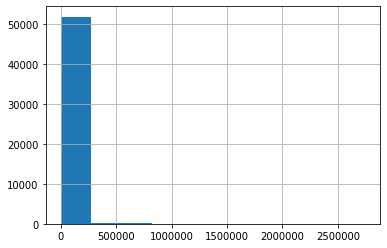

In [35]:
active_vols = wells2[(wells2['WellStatus_10.30.19'] == 'Active') | (wells2['WellStatus_10.30.19'] == 'New')]
active_vols['gas2co2'].hist()

At this point we simply have to trust that Active and New wells are active/new.


In [44]:
status_by_pool = wells2[['WellStatus_10.30.19', 'pool_id']]

active_wells = status_by_pool[(status_by_pool['WellStatus_10.30.19'] == 'Active') |
                              (status_by_pool['WellStatus_10.30.19'] == 'New')]


active_pools = active_wells.groupby('pool_id').count()
# active_pools.head()

# wells2.columns
# wells2['active_wells'] = 0
pools = pd.merge(wells2, active_pools, how='left', on='pool_id')


Index(['Updated_API', 'WellStatus_10.30.19', 'WellType_10.30.19',
       'OperatorName', 'FieldName', 'AreaName', 'Latitude', 'Longitude',
       'SPUDDate', 'PoolName', 'PoolWellTypeStatus', 'OperatorStatus',
       'Elevation', 'WellDepthAmount', 'HydraulicallyFractured',
       'CompletionDate', 'AbandonedDate', 'first_year', 'last year',
       'OilorCondensateProduced_2019', 'GasProduced_2019',
       'WaterProduced_2019', 'MaxCasingPressure_2019', 'APIGravityofOil_2019',
       'Status2019', 'OilorCondensateProduced_2020', 'GasProduced_2020',
       'WaterProduced_2020', 'DaysProducing_2020', 'MaxCasingPressure_2020',
       'APIGravityofOil_2020', 'FAP_Code_2020', 'Status2020', 'alloil',
       'allgas', 'pool_id', 'deadpool', 'allocated', 'setback_healthcare',
       'setback_daycare', 'setback_prison', 'setback_eldcare',
       'setback_resident', 'setback_pschool', 'setback_any', 'offshore',
       'gas2co2', 'oil2co2', 'active_wells'],
      dtype='object')

In [45]:
wells2.head(20)

,Updated_API,WellStatus_10.30.19,WellType_10.30.19,OperatorName,FieldName,AreaName,Latitude,Longitude,SPUDDate,PoolName,...,setback_daycare,setback_prison,setback_eldcare,setback_resident,setback_pschool,setback_any,offshore,gas2co2,oil2co2,active_wells
0,425921692.0,Active,OG,"DCOR, LLC",Belmont Offshore,Surfside,33.718685,-118.114121,NaN,No Pool Breakdown,...,NaN,NaN,NaN,NaN,NaN,0,0,10615.220250,10201.049869,0
1,425903062.0,#REF!,NaN,California Resources Production Corporation,Huntington Beach,Offshore,33.662184,-118.043721,NaN,No Pool Breakdown,...,NaN,NaN,NaN,NaN,NaN,0,1,1704.085528,4518.560629,0
2,403726717.0,Active,OG,Tidelands Oil Production Co.,Wilmington,Fault Block II-B,33.763416,-118.242104,NaN,Upper Terminal,...,NaN,NaN,NaN,NaN,NaN,0,0,1281.667776,5650.061527,0
3,403726769.0,Active,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.780663,-118.256867,NaN,Tar,...,NaN,NaN,1.0,1.0,NaN,1,0,1023.925884,6438.845144,0
4,403726770.0,Active,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.780727,-118.256867,NaN,Tar,...,NaN,NaN,1.0,1.0,NaN,1,0,564.943460,3333.070866,0
5,403727006.0,Unknown,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.781799,-118.255432,NaN,Tar,...,NaN,NaN,1.0,1.0,1.0,1,0,743.851326,4156.167979,0
6,403726871.0,Active,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.781319,-118.256912,NaN,Tar,...,NaN,NaN,1.0,1.0,1.0,1,0,617.831935,3809.710661,0
7,403726911.0,Plugged,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.780949,-118.256905,NaN,Tar,...,NaN,NaN,1.0,1.0,1.0,1,0,651.484375,4228.412073,0
8,403726624.0,Unknown,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.781895,-118.255707,NaN,Upper Terminal,...,NaN,NaN,1.0,1.0,1.0,1,0,942.422064,5593.044619,0
9,403726840.0,Unknown,OG,"Warren E&P, Inc.",Wilmington,Fault Block I,33.781387,-118.256920,NaN,Tar,...,NaN,NaN,1.0,1.0,1.0,1,0,779.293047,4870.275591,0


In [25]:
extant_wells = wells2[(wells2['WellStatus_10.30.19'] != 'Plugged') ]

In [26]:
temp = wells2[wells2['FieldName'] == 'Midway-Sunset']
temp.oil2co2.sum()

106118715.17397751

### Pools
This next section of code aggregates wells into field-area-pools.

In [27]:
pool_vols = wells2.groupby('pool_id').agg(
                Latitude=('Latitude', 'median'),
                Longitude=('Longitude', 'median'),
                WellDepth=('WellDepthAmount', 'median'),
                nwells=('Updated_API', 'count'),
                offshore=('offshore', 'median'),
                setback_any=('setback_any', 'sum'),
                gas2co2=('gas2co2', 'sum'),
                oil2co2=('oil2co2', 'sum')).reset_index()
pool_vols['totalco2']=pool_vols['gas2co2'] + pool_vols['oil2co2']
pool_vols.head()

# 'API_ID', 'WellStatus_10.30.19', 'WellType_10.30.19', 'OperatorName',
#                     'FieldName', 'AreaName', 'Latitude', 'Longitude', 'SPUDDate',
#                     'PoolCode', 'PoolName', 'PoolWellTypeStatus', 'OperatorStatus','WellDepthAmount',
#                     'HydraulicallyFractured', 'last year', 'Status2020',
#                     'allgas', 'alloil', 'gas2co2', 'oil2co2'

,pool_id,Latitude,Longitude,WellDepth,nwells,offshore,setback_any,gas2co2,oil2co2,totalco2
0,Afton Gas_Northwest (ABD)_Forbes,39.472635,-121.983906,NaN,3,0,0,25504.869840,0.000000,25504.869840
1,Afton Gas_Northwest (ABD)_Guinda,39.479211,-121.974473,NaN,1,0,0,10810.089028,0.000000,10810.089028
2,"Afton, South, Gas (ABD)_Any Area_Kione",39.422266,-121.967836,NaN,1,0,0,5683.844627,0.000000,5683.844627
3,Alegria Offshore (ABD)_Any Area_Vaqueros-Alegria,34.444741,-120.272959,NaN,1,0,0,32628.170255,38504.199475,71132.369730
4,Aliso Canyon_Any Area_Aliso,34.314967,-118.558427,NaN,16,0,0,72196.418802,62610.233281,134806.652083


In [66]:
pool_vols[pool_vols.pool_id.str.contains('Aliso Canyon')].head()


,pool_id,Latitude,Longitude,WellDepth,nwells,offshore,setback_any,gas2co2,oil2co2,totalco2
4,Aliso Canyon::Aliso,34.314967,-118.558427,NaN,16,0,0,7.219642e+04,62610.233281,1.348067e+05
5,"Aliso Canyon::Aliso, West",34.317809,-118.570791,NaN,2,0,0,9.034604e+03,8443.503937,1.747811e+04
6,Aliso Canyon::Porter-Del Aliso A-36,34.320148,-118.702681,11586.0,98,0,19,7.571949e+05,628592.049061,1.385787e+06
7,Aliso Canyon::Sesnon-Frew,34.313116,-118.555927,7850.0,107,0,1,8.876622e+07,140723.425197,8.890694e+07
8,Aliso Canyon::Wigdal,34.321349,-118.582372,7866.0,1,0,0,1.536781e+04,15785.236220,3.115305e+04


In [78]:
# Clean up the "Any Area" and "nan" areas/pools. Also eliminate the "Any Field"s.
pool_vols['pool_id']=pool_vols.pool_id.replace({"_": ":"},regex=True)
pool_vols['pool_id']=pool_vols.pool_id.replace({"Any Area": ""},regex=True)
pool_vols['pool_id']=pool_vols.pool_id.replace({":nan": ":"},regex=True)
pool_vols['pool_id']=pool_vols.pool_id.replace({":No Pool Breakdown": ":npool"},regex=True)
pool_vols['pool_id']=pool_vols.pool_id.replace({":No pool Breakdown": ":npool"},regex=True)
pool_vols = pool_vols[(pool_vols.pool_id != 'Any Field::')]
pool_vols = pool_vols[(pool_vols.pool_id != 'nan::')]
pool_vols['abandoned'] = False
pool_vols.loc[pool_vols.pool_id.str.contains('(ABD)'), 'abandoned'] = True

In [79]:
pool_vols.loc[pool_vols.pool_id.str.contains('Breakdown')]

,pool_id,Latitude,Longitude,WellDepth,nwells,offshore,setback_any,gas2co2,oil2co2,totalco2,abandoned


In [80]:
pool_vols.to_csv('pool_volumes.csv')

In [30]:
pool_vols.shape

(1246, 10)

THe rest of this code is copied from other decks to measure the total volumes of CO2 coming from emitters.

In [31]:
emissions = pd.read_excel(r'./Emissions by Unit and Fuel Type.xlsx',
                          sheet_name='UNIT_DATA', skiprows=4)
print(list(emissions.columns))
print(emissions.shape)
emissions = emissions[emissions.State == 'CA']
print(emissions.shape)
emsCA2019 = emissions[emissions['Reporting Year'] == 2019]
print(emsCA2019.shape)
# Unique values of Facility ID for 2019 emissions data from facilities in California 
print(len(set(emsCA2019['Facility Id'])))
# Unique values of Facility Name for 2019 emissions data from facilities in California
print(len(set(emsCA2019['Facility Name'])))
# Unique values of FRS ID for 2019 emissions data from facilities in California
print(len(set(emsCA2019['FRS Id'])))
facilities = pd.read_excel(r'./ghgp_data_2019.xlsx',
                          sheet_name='Direct Emitters', skiprows=3)

print(list(facilities.columns))
print(facilities.shape)
facilities = facilities[facilities.State == 'CA']
print(facilities.shape)

print(len(set(facilities['Facility Id'])))
print(len(set(facilities['Facility Name'])))
print(len(set(facilities['FRS Id'])))

ems = set(emsCA2019['Facility Id'])
facs = set(facilities['Facility Id'])

for fac in facs:
    if fac not in ems:
        print('facility id', fac, 'not in emissions data.')
for em in ems:
    if em not in facs:
        print('facility id', em, 'not in facilities data.')

facilitiesB = facilities.rename(inplace=False,
                                columns={'Facility Name':'Facility Name2',
                                         'City':'City2',
                                         'Primary NAICS Code':'Primary NAICS Code2',
                                         'Industry Type (subparts)':'Industry Type (subparts)2',
                                         'Industry Type (sectors)':'Industry Type (sectors)2'})

emsCA2019loc = pd.merge(emsCA2019, facilitiesB[['Facility Id',
#                                               'Facility Name2',
                                               'City2',
                                               'Zip Code',
                                               'Address',
                                               'County',
                                               'Latitude',
                                               'Longitude',
#                                               'Primary NAICS Code2',
                                               'Industry Type (subparts)2',
                                               'Industry Type (sectors)2']],
                        how='left', on='Facility Id')
print(emsCA2019loc.shape)
# tran2_df = pd.merge(tran_df, dupeval_df, how='left', on='value')

['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State', 'Primary NAICS Code', 'Reporting Year', 'Industry Type (subparts)', 'Industry Type (sectors)', 'Unit Name', 'Unit Type', 'Unit Reporting Method', 'Unit Maximum Rated Heat Input Capacity (mmBTU/hr)', 'Unit CO2 emissions (non-biogenic) ', 'Unit Methane (CH4) emissions ', 'Unit Nitrous Oxide (N2O) emissions ', 'Unit Biogenic CO2 emissions (metric tons)']
(190709, 17)
(10279, 17)
(927, 17)
298
295
368
['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State', 'Zip Code', 'Address', 'County', 'Latitude', 'Longitude', 'Primary NAICS Code', 'Industry Type (subparts)', 'Industry Type (sectors)', 'Total reported direct emissions', 'CO2 emissions (non-biogenic) ', 'Methane (CH4) emissions ', 'Nitrous Oxide (N2O) emissions ', 'HFC emissions', 'PFC emissions', 'SF6 emissions ', 'NF3 emissions', 'Other Fully Fluorinated GHG emissions', 'HFE emissions', 'Very Short-lived Compounds emissions', 'Other GHGs (metric tons CO2e)', 'Biogenic CO2 

In [32]:
emsCA2019loc.columns

Index(['Facility Id', 'FRS Id', 'Facility Name', 'City', 'State',
       'Primary NAICS Code', 'Reporting Year', 'Industry Type (subparts)',
       'Industry Type (sectors)', 'Unit Name', 'Unit Type',
       'Unit Reporting Method',
       'Unit Maximum Rated Heat Input Capacity (mmBTU/hr)',
       'Unit CO2 emissions (non-biogenic) ', 'Unit Methane (CH4) emissions ',
       'Unit Nitrous Oxide (N2O) emissions ',
       'Unit Biogenic CO2 emissions (metric tons)', 'City2', 'Zip Code',
       'Address', 'County', 'Latitude', 'Longitude',
       'Industry Type (subparts)2', 'Industry Type (sectors)2'],
      dtype='object')

In [33]:
emsCA2019loc['Unit CO2 emissions (non-biogenic) '].sum()

59638912.489999995